<a href="https://colab.research.google.com/github/LucaswasTaken/NES-DataScience/blob/main/Aula%205/Hello_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivos

* Entender como o aprendizado profundo pode resolver problemas que os métodos tradicionais de programação não podem
* Saiba mais sobre o [conjunto de dados de dígitos manuscritos do MNIST](http://yann.lecun.com/exdb/mnist/)
* Use o [Keras API](https://keras.io/) para carregar o conjunto de dados MNIST e prepará-lo para o treinamento
* Criar uma rede neural simples para realizar a classificação da imagem
* Treinar a rede neural utilizando o conjunto de dados MNIST preparados
* Observar o desempenho da rede neural treinada

## O problema: Classificação da imagem

Na programação tradicional, o programador é capaz de articular regras e condições em seu código que seu programa pode então usar para agir da maneira correta. Esta abordagem continua a funcionar excepcionalmente bem para uma enorme variedade de problemas.

A classificação de imagens, que pede a um programa que classifique corretamente uma imagem que nunca viu antes em sua classe correta, é quase impossível de resolver com as técnicas tradicionais de programação. Como um programador poderia definir as regras e condições para classificar corretamente uma enorme variedade de imagens, especialmente levando em conta imagens que ele nunca viu?

## A Solução: Deep Learning

O aprendizado profundo (Deep Learning) se sobressai no reconhecimento de padrões por tentativa e erro. Ao treinar uma rede neural profunda com dados suficientes e fornecer à rede um feedback sobre seu desempenho através de treinamento, a rede pode identificar, embora uma enorme quantidade de iteração, seu próprio conjunto de condições pelas quais pode agir da maneira correta.

## O MNIST Dataset

Na história do aprendizado profundo, a classificação precisa da imagem do [conjunto de dados MNIST] (http://yann.lecun.com/exdb/mnist/), uma coleção de 70.000 imagens em escala de cinza com dígitos escritos à mão de 0 a 9, foi um grande desenvolvimento. Embora hoje o problema seja considerado trivial, fazer a classificação de imagens com o MNIST tornou-se uma espécie de "Olá Mundo" para um aprendizado profundo.

## Dados e labels/etiquetas de treinamento e validação

1. `x_train`: Imagens utilizadas para o treinamento da rede neural
2. `y_train`: labels/etiquetas corretas para as imagens do `x_train`, utilizadas para avaliar as previsões do modelo durante o treinamento.
3. `x_valid`: Imagens reservadas para validar o desempenho do modelo após ter sido treinado
4. `y_valid`: labels/etiquetas corretas para as imagens `x_valid`, utilizadas para avaliar as previsões do modelo após ter sido treinado.

## Carregando os dados na memória (com Keras)

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# os dados, divididos entre o treino e os conjuntos de validação
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Explorando os dados MNIST

Declaramos acima que o conjunto de dados MNIST continha 70.000 imagens em escala de cinza de dígitos escritos à mão. Ao executar as seguintes células, podemos ver que a Keras partiu 60.000 destas imagens para treinamento, e 10.000 para validação (após treinamento), e também, que cada imagem em si é uma matriz 2D com as dimensões 28x28:

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_valid.shape

(10000, 28, 28)

Além disso, podemos ver que estas imagens 28x28 são representadas como uma coleção de valores inteiros não assinados de 8 bits entre 0 e 255, os valores correspondentes a um valor de escala de cinza de pixel onde `0` é preto, `255` é branco, e todos os outros valores estão no meio:

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train.min()

np.uint8(0)

In [ ]:
x_train.max()

np.uint8(255)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Usando [Matplotlib](https://matplotlib.org/), podemos renderizar uma dessas imagens em escala de cinza em nosso conjunto de dados:

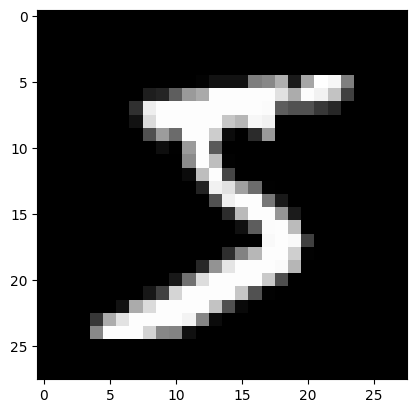

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

Desta forma, podemos ver agora que se trata de uma imagem de 28x28 pixels de um 5. Ou é um 3? A resposta está nos dados `y_train`, que contém etiquetas corretas para os dados. Vamos dar uma olhada:

In [ ]:
y_train[0]

np.uint8(5)

## Preparando os dados para o treinamento


No aprendizado profundo, é comum que os dados precisem ser transformados para estarem no estado ideal para o treinamento. Para este problema particular de classificação da imagem, há 3 tarefas que devemos realizar com os dados em preparação para o treinamento:
1. Flatten os dados da imagem, para simplificar a entrada da imagem no modelo
2. Normalizar os dados da imagem, para facilitar o trabalho com os valores de entrada da imagem para o modelo
3. Categorizar as etiquetas, para facilitar o trabalho com os valores das etiquetas para o modelo

### Flattenando os dados de imagem

Embora seja possível para um modelo de aprendizagem profunda aceitar uma imagem bidimensional (em nosso caso 28x28 pixels), vamos simplificar as coisas para começar e [reformular](https://www.tensorflow.org/api_docs/python/tf/reshape) cada imagem em um único conjunto de 784 pixels contínuos (nota: 28x28 = 784). Isto também é chamado de achatamento da imagem.

Aqui realizamos isto utilizando o método de ajuda `reshape':

In [ ]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

Podemos confirmar que os dados da imagem foram reformulados e são agora uma coleção de matrizes 1D contendo 784 valores de pixel cada uma:

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizando os dados de imagem

Modelos de aprendizagem profunda são melhores para lidar com números de ponto flutuante entre 0 e 1 (mais sobre este tópico mais adiante). A conversão de valores inteiros em valores de ponto flutuante entre 0 e 1 é chamada [normalização](https://developers.google.com/machine-learning/glossary#normalization), e uma abordagem simples que tomaremos aqui para normalizar os dados será dividir todos os valores de pixel (que se você se lembrar estão entre 0 e 255) por 255:

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

Agora podemos ver que todos os valores são valores de ponto flutuante entre `0,0` e `1,0`:

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
x_train.min()

np.float64(0.0)

In [ ]:
x_train.max()

np.float64(1.0)

### Categorical Encoding

Considere por um momento, se quiséssemos perguntar, o que é 7 - 2? Afirmar que a resposta foi 4 está mais perto do que afirmar que a resposta foi 9. No entanto, para este problema de classificação da imagem, não queremos que a rede neural aprenda este tipo de raciocínio: queremos apenas que ela selecione a categoria correta, e entenda que se tivermos uma imagem do número 5, essa suposição 4 é tão ruim quanto a suposição 9.

No estado atual, os rótulos das imagens são inteiros entre 0 e 9. Como estes valores representam um intervalo numérico, o modelo pode tentar tirar algumas conclusões sobre seu desempenho com base em quão próximo da categoria numérica correta ele adivinha.

Portanto, faremos algo aos nossos dados chamado codificação categórica. Este tipo de transformação modifica os dados para que cada valor seja uma coleção de todas as categorias possíveis, com a categoria real de que este valor particular é definido como verdadeiro.

Como um exemplo simples, considere se tivéssemos 3 categorias: vermelho, azul e verde. Para uma determinada cor, 2 destas categorias seriam falsas, e a outra seria verdadeira:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|True|False|False|
|Green|False|False|True|
|Blue|False|True|False|
|Green|False|False|True|

Em vez de usar "Verdadeiro" ou "Falso", poderíamos representar o mesmo usando o binário, seja 0 ou 1:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|1|0|0|
|Green|0|0|1|
|Blue|0|1|0|
|Green|0|0|1|

Isto é o que é codificação categórica, transformando valores que devem ser entendidos como rótulos categóricos em uma representação que torna sua natureza categórica explícita ao modelo. Assim, se estivéssemos utilizando estes valores para treinamento, converteríamos...

```python
values = ['red, green, blue, green']
```

... o que uma rede neural teria muita dificuldade de entender, ao invés disso:

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

### Codificação categórica dos labels

A Keras fornece uma utilidade para [codificar categoricamente valores](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), e aqui a usamos para realizar a codificação categórica tanto para as etiquetas de treinamento quanto para as etiquetas de validação:

In [ ]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

Aqui estão os primeiros 10 valores das etiquetas de treinamento, que você pode ver que agora foram categoricamente codificados:

In [ ]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Criando o modelo

Com os dados preparados para o treinamento, agora é hora de criar o modelo que iremos treinar com os dados. Este primeiro modelo básico será composto de várias *camadas* e será composto de 3 partes principais:

1. Uma camada de entrada, que receberá os dados em algum formato esperado
2. Várias [camadas ocultas](https://developers.google.com/machine-learning/glossary#hidden-layer), cada uma composta de muitos *neurônios*. Cada [neurônio](https://developers.google.com/machine-learning/glossary#neuron) terá a capacidade de afetar o palpite da rede com seus *pesos*, que são valores que serão atualizados ao longo de muitas iterações à medida que a rede recebe feedback sobre seu desempenho e aprende
3. Uma camada de saída, que retratará o palpite da rede para uma determinada imagem

### Instanciando o modelo

Para começar, usaremos a classe de modelo [Sequencial](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) da Keras para instanciar uma instância de um modelo que terá uma série de camadas que os dados passarão em seqüência:

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Criação da camada de entrada

Em seguida, adicionaremos a camada de entrada. Esta camada estará *densamente conectada*, o que significa que cada neurônio nela, e seus pesos, afetarão cada neurônio da camada seguinte. Para fazer isto com Keras, usamos a classe de camada [Densa](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) de Keras.

In [ ]:
from tensorflow.keras.layers import Dense

O argumento "units" especifica o número de neurônios na camada. Vamos utilizar o `512` que escolhemos a partir da experimentação. Escolher o número correto de neurônios é o que coloca a "ciência" na "ciência dos dados", pois é uma questão de capturar a complexidade estatística do conjunto de dados. Tente brincar com este valor mais tarde para ver como ele afeta o treinamento e para começar a desenvolver um sentido para o que este número significa.

Aprenderemos mais sobre funções de ativação mais tarde, mas por enquanto, utilizaremos a função de ativação `relu`, que em resumo, ajudará nossa rede a aprender como fazer suposições mais sofisticadas sobre os dados do que se fosse necessário fazer suposições baseadas em alguma função estritamente linear.

O valor `input_shape` especifica a forma dos dados recebidos que, em nossa situação, é uma matriz 1D de 784 valores:

In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Criando a camada oculta

Agora vamos acrescentar uma camada adicional densamente conectada. Mais uma vez, muito mais será dito sobre estes mais tarde, mas por enquanto sabemos que estas camadas dão à rede mais parâmetros para contribuir para seus palpites e, portanto, mais sutis oportunidades para um aprendizado preciso:

In [ ]:
model.add(Dense(units = 512, activation='relu'))

### Criação da camada de saída

Finalmente, vamos adicionar uma camada de saída. Esta camada utiliza a função de ativação `softmax` que resultará em que cada um dos valores da camada será uma probabilidade entre 0 e 1 e resultará em todas as saídas da camada adicionando a 1. Neste caso, uma vez que a rede deve fazer um palpite sobre uma única imagem pertencente a 1 de 10 categorias possíveis, haverá 10 saídas. Cada saída dá o palpite do modelo (uma probabilidade) de que a imagem pertence a essa classe específica:

In [ ]:
model.add(Dense(units = 10, activation='softmax'))

### Resumindo o Modelo

Keras fornece o método da instância modelo [resumo] (https://www.tensorflow.org/api_docs/python/tf/summary) que imprimirá um resumo legível de um modelo:

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Observe o número de parâmetros treináveis. Cada um deles pode ser ajustado durante o treinamento e irá contribuir para os palpites do modelo treinado.

#### Compilação do modelo

Mais uma vez, mais detalhes devem ser seguidos, mas o passo final que precisamos dar antes de podermos realmente treinar nosso modelo com dados é [compilá-lo](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile). Aqui especificamos uma [função de perda](https://developers.google.com/machine-learning/glossary#loss) que será usada para que o modelo entenda o seu desempenho durante o treinamento. Também especificamos que gostaríamos de rastrear a `accuracidade` enquanto o modelo treina:

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Treinando o Modelo

Agora que preparamos dados de treinamento e validação e um modelo, é hora de treinar nosso modelo com nossos dados de treinamento, e verificá-lo com seus dados de validação.

"Treinar um modelo com dados" também é freqüentemente chamado de "ajustar um modelo aos dados". Colocando desta última forma, ele destaca que a forma do modelo muda com o tempo para entender com mais precisão os dados que estão sendo fornecidos.

Ao ajustar (treinar) um modelo com Keras, usamos o método [ajuste] (https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) do modelo. Ele espera os seguintes argumentos:

* Os dados de treinamento
* As etiquetas para os dados de treinamento
* O número de vezes que deve treinar em todo o conjunto de dados de treinamento (chamado *epoch*)
* Os dados de validação ou teste, e suas etiquetas

Execute a célula abaixo para treinar o modelo. Discutiremos sua saída após a conclusão do treinamento:

In [ ]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8989 - loss: 0.3193 - val_accuracy: 0.9675 - val_loss: 0.1114
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.9753 - loss: 0.0833 - val_accuracy: 0.9743 - val_loss: 0.0932
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9832 - loss: 0.0595 - val_accuracy: 0.9787 - val_loss: 0.0863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9876 - loss: 0.0443 - val_accuracy: 0.9827 - val_loss: 0.0774
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9907 - loss: 0.0340 - val_accuracy: 0.9773 - val_loss: 0.1067
